In [1]:
# #looking for files 
# import os

# def search_files(directory, extension, keyword):
#     for root, dirs, files in os.walk(directory):
#         # Skip hidden directories
#         dirs[:] = [d for d in dirs if not d.startswith('.')]
        
#         for file in files:
#             if file.endswith(extension):
#                 file_path = os.path.join(root, file)
#                 try:
#                     with open(file_path, 'r', encoding='utf-8') as f:
#                         if keyword in f.read():
#                             print(f"Found '{keyword}' in: {file_path}")
#                 except Exception as e:
#                     print(f"Error reading file {file_path}: {e}")

# home_directory = os.path.expanduser('~')
# search_files(home_directory, '.ipynb', 'population')

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# TASK 1 - Fire detection: a) Inputs optimization

In [1]:
import pandas as pd
#read inputs 
print('Reading and processing RS inputs..')
data = pd.read_csv('FireDetection_datasetV4_0Days.csv', header=0)
data

Reading and processing RS inputs..


,LC_Type1,LC_Type2,LC_Type3,LC_Type4,LC_Type5,avgLongitude,avgLatitude,Elevation,Slope,Aspect,...,runoff_sum,total_evaporation_sum,snowfall_sum,snowmelt_sum,snow_depth,snow_density,snow_cover,dewpoint_temperature_2m,temperature_2m,isFire
0,8,8.0,4,4,4,-162.816950,62.953425,76,0.127839,275.667218,...,0.000868,-0.000535,0.000005,0.000000e+00,1.690267e-01,198.237289,100.000000,265.185745,269.474932,1
1,8,8.0,4,4,4,-147.158700,64.785600,151,0.267640,346.948073,...,0.000046,-0.002125,0.000000,1.543760e-05,-7.345365e-24,154.937485,0.102783,276.366584,281.858940,1
2,8,8.0,4,1,1,-148.539500,64.364500,174,0.289804,354.668166,...,0.000249,-0.003539,0.000000,0.000000e+00,-7.345365e-24,100.002263,0.000000,281.229359,291.656452,1
3,7,7.0,2,1,5,-146.508500,63.993100,580,0.545915,285.295886,...,0.001994,-0.000478,0.000000,3.360212e-06,-7.345365e-24,161.781235,0.082926,270.544548,274.700846,1
4,7,7.0,2,1,5,-146.352200,64.024000,453,0.447008,299.675079,...,0.000587,-0.000995,0.000000,4.351754e-03,2.640788e-02,267.080388,26.630371,273.304184,282.790248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,9,9.0,4,4,4,-161.893500,55.558100,266,0.025017,270.000000,...,0.000754,-0.001935,0.000000,3.725290e-09,-7.345365e-24,100.041977,0.000000,280.887743,283.055663,0
4151,9,9.0,4,4,4,-161.890900,55.562800,266,0.025017,270.000000,...,0.002284,-0.001564,0.000000,0.000000e+00,-7.345365e-24,100.024724,0.000000,277.829071,279.656916,0
4152,9,9.0,4,4,4,-161.875700,55.560600,196,0.025017,270.000000,...,0.002284,-0.001564,0.000000,0.000000e+00,-7.345365e-24,100.024724,0.000000,277.829071,279.656916,0
4153,9,9.0,4,4,4,-161.887600,55.558150,225,0.025017,270.000000,...,0.004974,-0.000148,0.000004,6.897748e-05,5.452474e-03,181.796534,5.496419,272.464273,274.284028,0


In [2]:
# Function to prepare sequences
def prepare_data(df, target, features):
    # Initialize an empty list to hold feature columns
    feature_columns = []

    # Loop through each feature and sequence length to get the corresponding columns
    for feature in features:
        column_name = f"{feature}"
        if column_name in df.columns:
            feature_columns.append(column_name)        
        
    # Extract the feature columns for X
    X = df[feature_columns].values
    
    # Extract the target column for y
    y = df[target].values
    
    feature_columns.append(target)
    
    return X, y, df[feature_columns]

In [6]:
def modellearning(trgt, selected_features):
    X, y, _ = prepare_data(data, trgt, selected_features)
#     print(X.shape)

    # Split into train and test sets
    all_indices = list(range(len(data)))
    train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42, stratify=data["isFire"])
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = np.squeeze(y[train_ind]), np.squeeze(y[test_ind])

    # Scale features
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)  

    # Train final ExtraTreesClassifier model under finetuned parameters
    model_final = HistGradientBoostingClassifier(random_state=42)#, #normal#V4
                                                 #learning_rate=0.2130,#0.121945,  # ensure learning_rate is at least 0.01
                                                 #max_iter=783,#1167,
                                                 #max_depth=19,#3,
                                                 #min_samples_leaf=4,#3,
                                                 #l2_regularization=0.1096,#0.1466,  # ensure l2_regularization is non-negative
                                                 #max_leaf_nodes=63)#38)
    model_final.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_test = model_final.predict(X_test_scaled)  # Reshape the data to 2D if needed

    # Evaluate the model
    accuracy_test = accuracy_score(y_test, y_pred_test)
    return accuracy_test

# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

####### Do not use this following cell but the following one as this one is an old version of a single stage

In [9]:
# !pip install deap
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random

# Dictionary to store ACCURACY for evaluated feature combinations
evaluated_combinations = {}

# Objective function for GA
def evalOneMax(individual, all_feature_names, target):
    selected_features = [all_feature_names[i] for i, is_selected in enumerate(individual) if is_selected]
#     print(selected_features, end=':')
    selected_features_tuple = tuple(sorted(selected_features))
    
    # Ensure at least 1 feature are selected
    if len(selected_features) < 0:
        return -float('inf'),
    
    # Always proceed with model training, bypassing the cache check
    acc = modellearning(target, selected_features)
#     print(np.round(acc*100,3), end=',')#
    return (acc,)

def optimize_features(target, nmbr_population, nmbr_generation, known_good_features=None):
    best_features = []  # Initialize to an empty list
    best_acc = -float('inf')  # Initialize to negative infinity
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(all_feature_names))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalOneMax, all_feature_names=all_feature_names, target=target)

    population = toolbox.population(n=nmbr_population)

    # Seed the population with a known good individual, if provided
    if known_good_features:
        good_individual = [0] * len(all_feature_names)
        for feature in known_good_features:
            idx = all_feature_names.index(feature)
            good_individual[idx] = 1
        population[0] = creator.Individual(good_individual)
        population[0].fitness.values = evalOneMax(population[0], all_feature_names, target)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=nmbr_generation, verbose=1)

    # Extract the best individual
    best_ind = tools.selBest(population, k=1)[0]
    best_features = [all_feature_names[i] for i, is_selected in enumerate(best_ind) if is_selected]
    best_acc = best_ind.fitness.values[0]
    
    return best_features, best_acc

# Your data loading here
target = 'isFire'
all_feature_names = list(data.columns[:-1])
known_good_features = ['LST_Day_1km','LST_Night_1km']  # Replace with your own known good features
nmbr_population = 500
nmbr_generation = 15

## Run optimization
print(f'*** Start optimization: Fire Detection')
best_features, best_acc = optimize_features(target, nmbr_population, nmbr_generation, known_good_features)
print(f"\n{best_features}; {best_acc}")

*** Start optimization: Fire Detection
gen	nevals
0  	499   
1  	280   
2  	319   
3  	320   
4  	294   
5  	316   
6  	290   
7  	315   
8  	306   
9  	313   
10 	306   
11 	310   
12 	324   
13 	286   
14 	303   
15 	295   

['LC_Type1', 'avgLatitude', 'Slope', 'Aspect', 'H', 'surface_pressure', 'snowfall_sum', 'snowmelt_sum', 'snow_cover']; 0.9061371841155235


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random

# Dictionary to store ACCURACY for evaluated feature combinations
evaluated_combinations = {}

# Objective function for GA
def evalOneMax(individual, all_feature_names, target):
    selected_features = [all_feature_names[i] for i, is_selected in enumerate(individual) if is_selected]
    selected_features_tuple = tuple(sorted(selected_features))
    
    # Ensure at least 1 feature is selected
    if len(selected_features) < 1:
        return -float('inf'),
    
    # Always proceed with model training, bypassing the cache check
    acc = modellearning(target, selected_features)
    return (acc,)

def optimize_features(target, all_feature_names, nmbr_population, nmbr_generation, known_good_features=None):
    best_features = []  # Initialize to an empty list
    best_acc = -float('inf')  # Initialize to negative infinity
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(all_feature_names))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalOneMax, all_feature_names=all_feature_names, target=target)

    population = toolbox.population(n=nmbr_population)

    # Seed the population with a known good individual, if provided
    if known_good_features:
        good_individual = [0] * len(all_feature_names)
        for feature in known_good_features:
            idx = all_feature_names.index(feature)
            good_individual[idx] = 1
        population[0] = creator.Individual(good_individual)
        population[0].fitness.values = evalOneMax(population[0], all_feature_names, target)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=nmbr_generation, verbose=1)

    # Extract the best individual
    best_ind = tools.selBest(population, k=1)[0]
    best_features = [all_feature_names[i] for i, is_selected in enumerate(best_ind) if is_selected]
    best_acc = best_ind.fitness.values[0]
    
    return best_features, best_acc

# Your data loading here
data = pd.read_csv('FireDetection_datasetV4_0Days.csv', header=0)
target = 'isFire'
all_feature_names = list(data.columns[:-1])
known_good_features = ['LST_Day_1km', 'LST_Night_1km']  # Replace with your own known good features

# # Initial GA Run to find a smaller subset of features
# nmbr_population_initial = 500
# nmbr_generation_initial = 15
print(f'*** Initial optimization: Fire Detection')
initial_best_features, initial_best_acc = ['LC_Type1', 'avgLatitude', 'Slope', 'Aspect', 'H', 'surface_pressure', 'snowfall_sum', 'snowmelt_sum', 'snow_cover'], 0.906137184
#optimize_features(target, all_feature_names, nmbr_population_initial, nmbr_generation_initial, known_good_features)
print(f"\nInitial Best Features: {initial_best_features}; Initial Best Accuracy: {initial_best_acc}")

# Refinement GA Run on the smaller subset of features
nmbr_population_refinement = 50
nmbr_generation_refinement = 20
print(f'*** Refinement optimization: Fire Detection')
refined_best_features, refined_best_acc = optimize_features(target, initial_best_features, nmbr_population_refinement, nmbr_generation_refinement)
print(f"\nRefined Best Features: {refined_best_features}; Refined Best Accuracy: {refined_best_acc}")


*** Initial optimization: Fire Detection

Initial Best Features: ['LC_Type1', 'avgLatitude', 'Slope', 'Aspect', 'H', 'surface_pressure', 'snowfall_sum', 'snowmelt_sum', 'snow_cover']; Initial Best Accuracy: 0.906137184
*** Refinement optimization: Fire Detection


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	37    
2  	19    
3  	28    
4  	28    
5  	30    
6  	30    
7  	35    
8  	32    
9  	28    
10 	36    
11 	27    
12 	26    
13 	28    
14 	30    
15 	31    
16 	28    
17 	33    
18 	32    
19 	34    
20 	37    

Refined Best Features: ['LC_Type1', 'avgLatitude', 'Slope', 'Aspect', 'H', 'snowfall_sum']; Refined Best Accuracy: 0.9133574007220217


In [16]:
modellearning(target, ['LC_Type1', 'avgLatitude', 'Slope', 'Aspect', 'snowfall_sum'])

0.9133574007220217

# TASK 2 - Burnt area estimation : a) Inputs optimization

In [17]:
import pandas as pd
#read inputs 
print('Reading and processing RS inputs..')
data = pd.read_csv('FireBurntArea_dataset_0Days.csv', header=0)
data

Reading and processing RS inputs..


,LC_Type1,LC_Type2,LC_Type3,LC_Type4,LC_Type5,avgLongitude,avgLatitude,Elevation,Slope,Aspect,...,runoff_sum,total_evaporation_sum,snowfall_sum,snowmelt_sum,snow_depth,snow_density,snow_cover,dewpoint_temperature_2m,temperature_2m,totalArea_km2
0,8,8,4,4,4,-162.81695,62.953425,76,0.127839,275.667218,...,0.000868,-0.000535,0.000005,0.000000e+00,1.690267e-01,198.237289,100.000000,265.185745,269.474932,0.979713
1,8,8,4,4,4,-147.15870,64.785600,151,0.267640,346.948073,...,0.000046,-0.002125,0.000000,1.543760e-05,-7.345365e-24,154.937485,0.102783,276.366584,281.858940,0.295989
2,8,8,4,1,1,-148.53950,64.364500,174,0.289804,354.668166,...,0.000249,-0.003539,0.000000,0.000000e+00,-7.345365e-24,100.002263,0.000000,281.229359,291.656452,0.250000
3,7,7,2,1,5,-146.50850,63.993100,580,0.545915,285.295886,...,0.001994,-0.000478,0.000000,3.360212e-06,-7.345365e-24,161.781235,0.082926,270.544548,274.700846,0.250000
4,7,7,2,1,5,-146.35220,64.024000,453,0.447008,299.675079,...,0.000587,-0.000995,0.000000,4.351754e-03,2.640788e-02,267.080388,26.630371,273.304184,282.790248,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,8,8,4,1,1,-145.93715,64.643550,313,0.400006,334.382444,...,0.000534,-0.002531,0.000000,7.450581e-09,-7.345365e-24,105.813136,0.000000,280.222176,287.991054,0.830562
2066,15,15,9,7,10,-161.88630,55.418800,2186,0.025017,270.000000,...,0.006850,-0.000637,0.000000,6.294075e-03,1.344824e+01,180.705714,40.343750,281.538507,282.846760,0.250000
2067,15,15,9,7,10,-161.89350,55.417900,2479,0.025017,270.000000,...,0.006829,-0.001089,0.000000,6.279286e-03,1.344824e+01,180.694321,40.343750,278.835497,280.776448,0.250000
2068,15,15,9,7,10,-161.89090,55.422600,2100,0.025017,270.000000,...,0.004876,-0.000546,0.000000,3.418032e-03,1.344824e+01,194.436834,40.363200,275.874074,277.500503,0.250000


In [19]:
# Function to prepare sequences
def prepare_data(df, target, features):
    # Initialize an empty list to hold feature columns
    feature_columns = []

    # Loop through each feature and sequence length to get the corresponding columns
    for feature in features:
        column_name = f"{feature}"
        if column_name in df.columns:
            feature_columns.append(column_name)        
        
    # Extract the feature columns for X
    X = df[feature_columns].values
    
    # Extract the target column for y
    y = df[target].values
    
    feature_columns.append(target)
    
    return X, y, df[feature_columns]

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    """
    Compute the Mean Absolute Scaled Error (MASE).
    
    Parameters:
    y_true: array-like of shape (n_samples,) - Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,) - Estimated target values.
    y_train: array-like of shape (n_samples,) - Training data to calculate the naive forecast.

    Returns:
    mase: float - Mean Absolute Scaled Error.
    """
    # Check for the length of y_train
    if len(y_train) < 2:
        raise ValueError("Length of y_train should be at least 2.")

    # Calculate MAE for the predictions
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAE of the one-step naive forecast method
    naive_forecast = y_train[:-1]
    naive_true = y_train[1:]
    mae_naive = mean_absolute_error(naive_true, naive_forecast)

    # Handle the case when naive MAE is zero to avoid division by zero
    if mae_naive == 0:
        return np.inf if mae != 0 else 0

    # Calculate MASE
    mase = mae / mae_naive

    return mase

In [21]:
from sklearn.ensemble import HistGradientBoostingRegressor
def modellearning(trgt, selected_features):
    X, y, _ = prepare_data(data, trgt, selected_features)
#     print(X.shape)

    # Split into train and test sets
    all_indices = list(range(len(data)))
    train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42, stratify=None)
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = np.squeeze(y[train_ind]), np.squeeze(y[test_ind])

    # Scale features
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)  

    # Train final ExtraTreesClassifier model under finetuned parameters
    model_final = HistGradientBoostingRegressor(random_state=42)#ExtraTreesRegressor(n_jobs=-1, random_state=42, max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=70)
    model_final.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_test = model_final.predict(X_test_scaled)  # Reshape the data to 2D if needed

    # Evaluate the model
    mase_test = mean_absolute_scaled_error(y_test, y_pred_test, y_train)
    return mase_test

# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [25]:
# !pip install deap
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random

# Dictionary to store MASE for evaluated feature combinations
evaluated_combinations = {}

# Objective function for GA
def evalOneMax(individual, all_feature_names, target):
    selected_features = [all_feature_names[i] for i, is_selected in enumerate(individual) if is_selected]
#     print(selected_features, end=':')
    selected_features_tuple = tuple(sorted(selected_features))
    
    # Ensure at least 1 feature are selected
    if len(selected_features) < 0:
        return float('inf'),
    
    # Always proceed with model training, bypassing the cache check
    mase = modellearning(target, selected_features)
#     print(np.round(mase*100,3), end=',')#
    return (mase,)

def optimize_features(target, all_feature_names, nmbr_population, nmbr_generation, known_good_features=None):
    best_features = []  # Initialize to an empty list
    best_mase = float('inf')  # Initialize to negative infinity
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(all_feature_names))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalOneMax, all_feature_names=all_feature_names, target=target)

    population = toolbox.population(n=nmbr_population)

    # Seed the population with a known good individual, if provided
    if known_good_features:
        good_individual = [0] * len(all_feature_names)
        for feature in known_good_features:
            idx = all_feature_names.index(feature)
            good_individual[idx] = 1
        population[0] = creator.Individual(good_individual)
        population[0].fitness.values = evalOneMax(population[0], all_feature_names, target)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=nmbr_generation, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, k=1)[0]
    best_features = [all_feature_names[i] for i, is_selected in enumerate(best_ind) if is_selected]
    best_mase = best_ind.fitness.values[0]
    
    return best_features, best_mase

# Your data loading here
target = 'totalArea_km2'
all_feature_names = list(data.columns[:-1])
known_good_features = ['LST_Day_1km','LST_Night_1km']  # Replace with your own known good features

# # Initial GA Run to find a smaller subset of features
# nmbr_population_initial = 500
# nmbr_generation_initial = 15
print(f'*** Initial optimization: Fire Burnt area')
initial_best_features, initial_best_acc = ['LC_Type1', 'LC_Type3', 'LC_Type4', 'avgLongitude', 'EVI', 'sur_refl_b02', 'Albedo_BSA_nir', 'Albedo_BSA_shortwave', 'Albedo_WSA_nir', 'dayl', 'LST_Day_1km', 'LST_Night_1km', 'Y', 'M', 'D', 'H', 'v_component_of_wind_10m', 'surface_pressure', 'total_evaporation_sum', 'snowfall_sum', 'snowmelt_sum', 'snow_cover', 'temperature_2m'], 0.7306982670616932
#optimize_features(target, all_feature_names, nmbr_population_initial, nmbr_generation_initial, known_good_features)
print(f"\nInitial Best Features: {initial_best_features}; Initial Best Accuracy: {initial_best_acc}")

# Refinement GA Run on the smaller subset of features
nmbr_population_refinement = 50
nmbr_generation_refinement = 20
print(f'*** Refinement optimization: Fire Burnt area')
refined_best_features, refined_best_acc = optimize_features(target, initial_best_features, nmbr_population_refinement, nmbr_generation_refinement)
print(f"\nRefined Best Features: {refined_best_features}; Refined Best Accuracy: {refined_best_acc}")

*** Initial optimization: Fire Burnt area

Initial Best Features: ['LC_Type1', 'LC_Type3', 'LC_Type4', 'avgLongitude', 'EVI', 'sur_refl_b02', 'Albedo_BSA_nir', 'Albedo_BSA_shortwave', 'Albedo_WSA_nir', 'dayl', 'LST_Day_1km', 'LST_Night_1km', 'Y', 'M', 'D', 'H', 'v_component_of_wind_10m', 'surface_pressure', 'total_evaporation_sum', 'snowfall_sum', 'snowmelt_sum', 'snow_cover', 'temperature_2m']; Initial Best Accuracy: 0.7306982670616932
*** Refinement optimization: Fire Burnt area


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	26    
2  	30    
3  	30    
4  	29    
5  	25    
6  	32    
7  	29    
8  	37    
9  	34    
10 	26    
11 	33    
12 	45    
13 	37    
14 	30    
15 	29    
16 	31    
17 	32    
18 	33    
19 	30    
20 	32    
21 	34    
22 	25    
23 	31    
24 	28    
25 	34    
26 	30    
27 	31    
28 	26    
29 	25    
30 	36    

Refined Best Features: ['LC_Type3', 'avgLongitude', 'EVI', 'Albedo_BSA_nir', 'dayl', 'Y', 'D', 'H', 'v_component_of_wind_10m', 'surface_pressure', 'snowmelt_sum', 'snow_cover']; Refined Best Accuracy: 0.7538299596403665


In [36]:
modellearning(target, ['LC_Type1', 'avgLongitude', 'EVI', 'Albedo_BSA_nir', 'dayl', 'LST_Night_1km', 'Y', 'M', 'D', 'v_component_of_wind_10m', 'surface_pressure', 'snowmelt_sum'])

0.7319584822213083

### TASK 3 - Duration estimation : a) Inputs optimization

In [37]:
import pandas as pd
#read inputs 
print('Reading and processing RS inputs..')
data = pd.read_csv('FireDuration_dataset_0Days.csv', header=0)
data

Reading and processing RS inputs..


,LC_Type1,LC_Type2,LC_Type3,LC_Type4,LC_Type5,avgLongitude,avgLatitude,Elevation,Slope,Aspect,...,runoff_sum,total_evaporation_sum,snowfall_sum,snowmelt_sum,snow_depth,snow_density,snow_cover,dewpoint_temperature_2m,temperature_2m,Duration
0,8,8,4,4,4,-162.81695,62.953425,76,0.127839,275.667218,...,0.000868,-0.000535,0.000005,0.000000e+00,1.690267e-01,198.237289,100.000000,265.185745,269.474932,1
1,8,8,4,4,4,-147.15870,64.785600,151,0.267640,346.948073,...,0.000046,-0.002125,0.000000,1.543760e-05,-7.345365e-24,154.937485,0.102783,276.366584,281.858940,1
2,8,8,4,1,1,-148.53950,64.364500,174,0.289804,354.668166,...,0.000249,-0.003539,0.000000,0.000000e+00,-7.345365e-24,100.002263,0.000000,281.229359,291.656452,1
3,7,7,2,1,5,-146.50850,63.993100,580,0.545915,285.295886,...,0.001994,-0.000478,0.000000,3.360212e-06,-7.345365e-24,161.781235,0.082926,270.544548,274.700846,1
4,7,7,2,1,5,-146.35220,64.024000,453,0.447008,299.675079,...,0.000587,-0.000995,0.000000,4.351754e-03,2.640788e-02,267.080388,26.630371,273.304184,282.790248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,8,8,4,1,1,-145.93715,64.643550,313,0.400006,334.382444,...,0.000534,-0.002531,0.000000,7.450581e-09,-7.345365e-24,105.813136,0.000000,280.222176,287.991054,1
2066,15,15,9,7,10,-161.88630,55.418800,2186,0.025017,270.000000,...,0.006850,-0.000637,0.000000,6.294075e-03,1.344824e+01,180.705714,40.343750,281.538507,282.846760,1
2067,15,15,9,7,10,-161.89350,55.417900,2479,0.025017,270.000000,...,0.006829,-0.001089,0.000000,6.279286e-03,1.344824e+01,180.694321,40.343750,278.835497,280.776448,1
2068,15,15,9,7,10,-161.89090,55.422600,2100,0.025017,270.000000,...,0.004876,-0.000546,0.000000,3.418032e-03,1.344824e+01,194.436834,40.363200,275.874074,277.500503,1


In [38]:
# Function to prepare sequences
def prepare_data(df, target, features):
    # Initialize an empty list to hold feature columns
    feature_columns = []

    # Loop through each feature and sequence length to get the corresponding columns
    for feature in features:
        column_name = f"{feature}"
        if column_name in df.columns:
            feature_columns.append(column_name)        
        
    # Extract the feature columns for X
    X = df[feature_columns].values
    
    # Extract the target column for y
    y = df[target].values
    
    feature_columns.append(target)
    
    return X, y, df[feature_columns]

In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    """
    Compute the Mean Absolute Scaled Error (MASE).
    
    Parameters:
    y_true: array-like of shape (n_samples,) - Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,) - Estimated target values.
    y_train: array-like of shape (n_samples,) - Training data to calculate the naive forecast.

    Returns:
    mase: float - Mean Absolute Scaled Error.
    """
    # Check for the length of y_train
    if len(y_train) < 2:
        raise ValueError("Length of y_train should be at least 2.")

    # Calculate MAE for the predictions
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAE of the one-step naive forecast method
    naive_forecast = y_train[:-1]
    naive_true = y_train[1:]
    mae_naive = mean_absolute_error(naive_true, naive_forecast)

    # Handle the case when naive MAE is zero to avoid division by zero
    if mae_naive == 0:
        return np.inf if mae != 0 else 0

    # Calculate MASE
    mase = mae / mae_naive

    return mase

In [40]:
def modellearning(trgt, selected_features):
    X, y, _ = prepare_data(data, trgt, selected_features)
#     print(X.shape)

    # Split into train and test sets
    all_indices = list(range(len(data)))
    train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42, stratify=None)
    
    X_train, X_test = X[train_ind], X[test_ind]
    y_train, y_test = np.squeeze(y[train_ind]), np.squeeze(y[test_ind])

    # Scale features
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)  

    # Train final ExtraTreesClassifier model under finetuned parameters
    model_final = HistGradientBoostingRegressor(random_state=42)#ExtraTreesRegressor(n_jobs=-1, random_state=42, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50)
    model_final.fit(X_train_scaled, y_train)


    # Make predictions
    y_pred_test = model_final.predict(X_test_scaled)  # Reshape the data to 2D if needed

    # Evaluate the model
    mase_test = mean_absolute_scaled_error(y_test, y_pred_test, y_train)
    return mase_test

# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [41]:
# !pip install deap
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random

# Dictionary to store MASE for evaluated feature combinations
evaluated_combinations = {}

# Objective function for GA
def evalOneMax(individual, all_feature_names, target):
    selected_features = [all_feature_names[i] for i, is_selected in enumerate(individual) if is_selected]
#     print(selected_features, end=':')
    selected_features_tuple = tuple(sorted(selected_features))
    
    # Ensure at least 1 feature are selected
    if len(selected_features) < 0:
        return float('inf'),
    
    # Always proceed with model training, bypassing the cache check
    mase = modellearning(target, selected_features)
#     print(np.round(mase*100,3), end=',')#
    return (mase,)

def optimize_features(target, all_feature_names, nmbr_population, nmbr_generation, known_good_features=None):
    best_features = []  # Initialize to an empty list
    best_mase = float('inf')  # Initialize to negative infinity
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(all_feature_names))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalOneMax, all_feature_names=all_feature_names, target=target)

    population = toolbox.population(n=nmbr_population)

    # Seed the population with a known good individual, if provided
    if known_good_features:
        good_individual = [0] * len(all_feature_names)
        for feature in known_good_features:
            idx = all_feature_names.index(feature)
            good_individual[idx] = 1
        population[0] = creator.Individual(good_individual)
        population[0].fitness.values = evalOneMax(population[0], all_feature_names, target)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=nmbr_generation, verbose=True)

    # Extract the best individual
    best_ind = tools.selBest(population, k=1)[0]
    best_features = [all_feature_names[i] for i, is_selected in enumerate(best_ind) if is_selected]
    best_mase = best_ind.fitness.values[0]
    
    return best_features, best_mase

# Your data loading here
target = 'Duration'
all_feature_names = list(data.columns[:-1])
known_good_features = ['LST_Day_1km','LST_Night_1km']  # Replace with your own known good features

# # Initial GA Run to find a smaller subset of features
# nmbr_population_initial = 500
# nmbr_generation_initial = 15
print(f'*** Initial optimization: Fire Duration')
initial_best_features, initial_best_acc = ['LC_Type1', 'LC_Type2', 'LC_Type3', 'LC_Type4', 'avgLongitude', 'avgLatitude', 'Slope', 'NDVI', 'sur_refl_b07', 'Albedo_WSA_nir', 'Albedo_WSA_shortwave', 'prcp', 'srad', 'tmax', 'Y', 'M', 'D', 'W', 'v_component_of_wind_10m', 'u_component_of_wind_10m', 'runoff_sum', 'snow_depth', 'dewpoint_temperature_2m', 'temperature_2m'], 0.540659225
#optimize_features(target, all_feature_names, nmbr_population_initial, nmbr_generation_initial, known_good_features)
print(f"\nInitial Best Features: {initial_best_features}; Initial Best Accuracy: {initial_best_acc}")

# Refinement GA Run on the smaller subset of features
nmbr_population_refinement = 50
nmbr_generation_refinement = 20
print(f'*** Refinement optimization: Fire Duration')
refined_best_features, refined_best_acc = optimize_features(target, initial_best_features, nmbr_population_refinement, nmbr_generation_refinement)
print(f"\nRefined Best Features: {refined_best_features}; Refined Best Accuracy: {refined_best_acc}")

*** Initial optimization: Fire Duration

Initial Best Features: ['LC_Type1', 'LC_Type2', 'LC_Type3', 'LC_Type4', 'avgLongitude', 'avgLatitude', 'Slope', 'NDVI', 'sur_refl_b07', 'Albedo_WSA_nir', 'Albedo_WSA_shortwave', 'prcp', 'srad', 'tmax', 'Y', 'M', 'D', 'W', 'v_component_of_wind_10m', 'u_component_of_wind_10m', 'runoff_sum', 'snow_depth', 'dewpoint_temperature_2m', 'temperature_2m']; Initial Best Accuracy: 0.540659225
*** Refinement optimization: Fire Duration


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	30    
2  	26    
3  	29    
4  	26    
5  	26    
6  	30    
7  	35    
8  	26    
9  	30    
10 	34    
11 	35    
12 	26    
13 	24    
14 	36    
15 	19    
16 	33    
17 	33    
18 	23    
19 	30    
20 	22    

Refined Best Features: ['LC_Type2', 'avgLongitude', 'avgLatitude', 'Slope', 'NDVI', 'Albedo_WSA_nir', 'Albedo_WSA_shortwave', 'prcp', 'srad', 'tmax', 'Y', 'M', 'D', 'v_component_of_wind_10m', 'runoff_sum', 'snow_depth', 'dewpoint_temperature_2m']; Refined Best Accuracy: 0.5406069981427012


In [50]:
modellearning(target, ['LC_Type1', 'avgLongitude', 'avgLatitude', 'Slope', 'NDVI', 'Albedo_WSA_nir', 'Albedo_WSA_shortwave', 'prcp', 'srad', 'tmax', 'Y', 'M', 'D', 'v_component_of_wind_10m', 'runoff_sum', 'snow_depth', 'dewpoint_temperature_2m'])

0.5406069981427012

# TASK 1 - Fire detection: model learning (classification)

In [328]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

In [344]:
# **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
!pip install --upgrade pip
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null
from tsai.all import *
computer_setup()

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
os              : Linux-4.18.0-372.32.1.el8_6.x86_64-x86_64-with-glibc2.28
python          : 3.9.18
tsai            : 0.3.8
fastai          : 2.7.13
fastcore        : 1.5.29
torch           : 2.0.1+cu117
device          : 2 gpus (['Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB'])
cpu cores       : 36
threads per cpu : 1
RAM             : 1511.54 GB
GPU memory      : [32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0] GB


In [330]:
cd '/home/mohamed.ahajjam/FireImpact/'

/home/mohamed.ahajjam/FireImpact


# **CONFIGURATION**

In [345]:
#read inputs 
print('Reading and processing RS inputs..')
features = ['LC_Type1','LC_Type2','LC_Type3','LC_Type4','LC_Type5', 'Elevation', 'NDVI', 'EVI', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'Clear_day_cov','Clear_night_cov','Albedo_BSA_nir','Albedo_BSA_shortwave','Albedo_WSA_nir','Albedo_WSA_shortwave','prcp', 'srad', 'dayl', 'tmax', 'tmin','LST_Day_1km','LST_Night_1km','Y','M', 'D', 'W', 'H', 'S','v_component_of_wind_10m','u_component_of_wind_10m','surface_pressure','runoff_sum','total_evaporation_sum','snowfall_sum','snowmelt_sum','snow_depth','snow_density','snow_cover','dewpoint_temperature_2m','temperature_2m']
base_filename = 'Fires_task1_preprocessed_{}.csv'
for feature in features:
    locals()[feature] = pd.read_csv(base_filename.format(feature), header=0)

#     df = locals()[feature]
#     print(df.head(0))

# features = ['NDVI', 'EVI']
# base_filename = 'Fires_task1_preprocessed_{}.csv'
# for feature in features:
#     locals()[feature] = pd.read_csv(base_filename.format(feature), header=None)*0.0001

Reading and processing RS inputs..


In [346]:
# # Create a boolean mask for rows with all elements missing in each dataframe
# mask_df1 = tmax.isnull().all(axis=1)
# mask_df2 = tmin.isnull().all(axis=1)
# mask_df3 = srad.isnull().all(axis=1)
# mask_df4 = prcp.isnull().all(axis=1)
# mask_df5 = dayl.isnull().all(axis=1)
# mask_df6 = NDVI.isnull().all(axis=1)
# mask_df7 = EVI.isnull().all(axis=1)
# # Combine masks to find rows with all elements missing in at least one dataframe
# combined_mask = mask_df1 | mask_df2 | mask_df3 | mask_df4 | mask_df5 | mask_df6 | mask_df7  # Use bitwise OR to combine masks
# # Get indices of rows to drop
# indices_to_drop = combined_mask[combined_mask].index

# features = ['tmax', 'tmin', 'srad', 'prcp', 'dayl', 'NDVI', 'EVI']
# for feature in features:
#     df = locals()[feature]
#     locals()[feature] = df.drop(indices_to_drop)
# for feature in features:
#     df = locals()[feature]
#     locals()[feature] = df.apply(lambda row: row.interpolate(method='linear').ffill().bfill(), axis=1) 
    
# TS = TS.drop(indices_to_drop)

In [347]:
# print('Processing time-related inputs..')

# # !pip install holidays
# import holidays
# from datetime import datetime
# from sklearn.preprocessing import OrdinalEncoder

# # For holidays in USA
# us_holidays = holidays.UnitedStates()

# #functions
# def get_day(x):
#     return x.day
# def get_month(x):
#     return x.month    
# def get_year(x):
#     return x.year    
# def is_weekend(x):
#     return x.weekday() >= 5  # 5 for Saturday, 6 for Sunday
# def is_holiday(x):
#     return int(x in us_holidays)
# def get_astronomical_season(date):
#     year = date.year
#     # Define the dates for solstices and equinoxes (approximate and may vary)
#     spring_equinox = datetime(year, 3, 20)
#     summer_solstice = datetime(year, 6, 21)
#     fall_equinox = datetime(year, 9, 22)
#     winter_solstice = datetime(year, 12, 21)

#     if spring_equinox <= date < summer_solstice:
#         return 0#'Spring'
#     elif summer_solstice <= date < fall_equinox:
#         return 1#'Summer'
#     elif fall_equinox <= date < winter_solstice:
#         return 2#'Fall'
#     else:
#         return 3#'Winter'

# cols = TS.columns[:]
# TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
# TS_data = TS.iloc[:,:] 
# TS_D = TS_data.applymap(get_day)
# TS_M = TS_data.applymap(get_month)
# TS_Y = TS_data.applymap(get_year)
# TS_S = TS.applymap(get_astronomical_season)
# TS_W = TS.applymap(is_weekend)
# TS_H = TS.applymap(is_holiday)

In [348]:
from sklearn.preprocessing import OrdinalEncoder

print('Transforming to 3D..')

feature_names = ''

features = ['Elevation', 'NDVI', 'EVI', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'Clear_day_cov','Clear_night_cov','Albedo_BSA_nir','Albedo_BSA_shortwave','Albedo_WSA_nir','Albedo_WSA_shortwave','prcp', 'srad', 'dayl', 'tmax', 'tmin','LST_Day_1km','LST_Night_1km','v_component_of_wind_10m','u_component_of_wind_10m','surface_pressure','runoff_sum','total_evaporation_sum','snowfall_sum','snowmelt_sum','snow_depth','snow_density','snow_cover','dewpoint_temperature_2m','temperature_2m']
for feature in features:
    df = locals()[feature]
    locals()[f'{feature}_data'] = to3d(df.iloc[:,:].values)
    feature_names = feature_names + f'{feature}_data' + ','

del df

features1 = ['LC_Type1','LC_Type2','LC_Type3','LC_Type4','LC_Type5','D','M','Y','S','W','H']
for feature in features1:
    locals()[f'encoder_{feature}'] = OrdinalEncoder()

# transform data
features1 = ['LC_Type1','LC_Type2','LC_Type3','LC_Type4','LC_Type5','D','M','Y','S','W','H']
for feature in features1:
    df = locals()[feature]
    enc = locals()[f'encoder_{feature}']
    locals()[f'TS_{feature}'] = to3d(enc.fit_transform(df))
    feature_names = feature_names + f'TS_{feature}' + ','

Transforming to 3D..


In [365]:
print('Processing Target..')

wildfire_data = pd.read_csv('Fires_task1_preprocessed_targets.csv')
# isFire = wildfire_data['isFire']
tmp = wildfire_data[wildfire_data["isFire"]==1]
# totalArea_km2 = tmp['totalArea_km2']
Duration = tmp['Duration']

# Target_data = to3d(isFire.values).reshape(len(isFire), 1, 1)
# Target_data = to3d(totalArea_km2.values).reshape(len(totalArea_km2), 1, 1)
Target_data = to3d(Duration.values).reshape(len(Duration), 1, 1)
Target_data.shape

Processing Target..


(2070, 1, 1)

In [366]:
print('Concatenating all data..')#[feature_names[:-1]]
data = np.concatenate([Elevation_data,NDVI_data,EVI_data,sur_refl_b01_data,sur_refl_b02_data,sur_refl_b03_data,sur_refl_b07_data,Clear_day_cov_data,Clear_night_cov_data,Albedo_BSA_nir_data,Albedo_BSA_shortwave_data,Albedo_WSA_nir_data,Albedo_WSA_shortwave_data,prcp_data,srad_data,dayl_data,tmax_data,tmin_data,LST_Day_1km_data,LST_Night_1km_data,v_component_of_wind_10m_data,u_component_of_wind_10m_data,surface_pressure_data,runoff_sum_data,total_evaporation_sum_data,snowfall_sum_data,snowmelt_sum_data,snow_depth_data,snow_density_data,snow_cover_data,dewpoint_temperature_2m_data,temperature_2m_data,TS_LC_Type1,TS_LC_Type2,TS_LC_Type3,TS_LC_Type4,TS_LC_Type5,TS_D,TS_M,TS_Y,TS_S,TS_W,TS_H],axis=1)
data = data[wildfire_data["isFire"]==1]
data.shape

Concatenating all data..


(2070, 43, 91)

Splitting to train and test sets..
training set:  (1656, 43, 91) (1656, 1) , testing set:  (414, 43, 91) (414, 1)


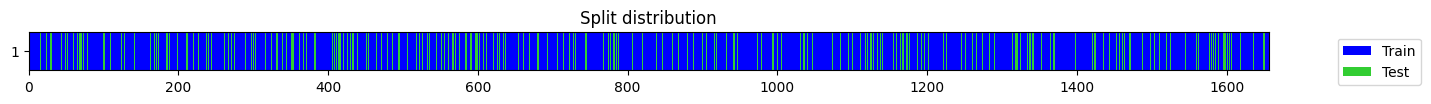

In [367]:
print('Splitting to train and test sets..')

all_indices = list(range(len(data)))
train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42, stratify=None)

X_train, X_test = data[train_ind,:,:], data[test_ind,:,:]
y_train, y_test = np.squeeze(Target_data[train_ind], axis=2), np.squeeze(Target_data[test_ind], axis=2)
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

# splits = get_splits(y_train, valid_size=.2, stratify=True, random_state=42, shuffle=True)
splits = get_splits(y_train, valid_size=.2, stratify=None, random_state=42, shuffle=True)

# tfms = [None, TSClassification()]
tfms = [None, TSRegression()]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[512, 1048])    
batch_tfms = TSStandardize(by_sample=True)

## Train using InceptionTime

In [352]:
del lr

In [368]:
matplotlib.pyplot.isjulia_display = False
archs = {'TransformerLSTMPlus','TransformerRNNPlus','TransformerGRUPlus','InceptionTimePlus','TSTPlus','HydraMultiRocketPlus','XCMPlus','LSTMPlus'}
results = pd.DataFrame(columns=['arch', 'total params', 'learningrate','train dur.', 'train loss', 'valid loss', 'train rmse', 'test dur.', 'test rmse'])
i = 0
for arch in archs:
    print(arch)
    learn = TSRegressor(X_train, y_train, splits=splits, path='models', arch=arch, tfms=tfms, batch_tfms=batch_tfms, metrics = [rmse, mae], cbs=None)
    try:
        lr = learn.lr_find()
    except IndexError:
        lr = learn.lr_find()
            
    start = time.time()
    learn.fit_one_cycle(10, lr.valley)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]

    valid_dl = dls.valid

    test_ds = valid_dl.dataset.add_test(X_test, y_test)
    test_dl = valid_dl.new(test_ds)
    start = time.time()
#     _, test_targetdata, test_predsdata = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
    _, test_targetdata, test_predsdata = learn.get_X_preds(X_test,y_test, with_decoded=True)
    elapsed_te = time.time() - start
    d = pd.DataFrame([])
    d = np.squeeze(test_targetdata)
    dp = pd.DataFrame([])
    dp = np.squeeze(test_predsdata)
    
    matplotlib.pyplot.show()
    
    results.loc[i] = [arch, count_parameters(learn.model), lr[0], elapsed, vals[0], vals[1], vals[2], elapsed_te, np.sqrt(mean_squared_error(d, dp))]
    results.sort_values(by='test rmse', ascending=True, kind='stable', ignore_index=True, inplace=True)
    clear_output()
    i+= 1
    
display(results)

,arch,total params,learningrate,train dur.,train loss,valid loss,train rmse,test dur.,test rmse
0,HydraMultiRocketPlus,53825,0.000331,12.833652,73.391685,83.021469,9.111611,0.397209,8.330618
1,InceptionTimePlus,474561,0.000479,3.452403,54.531258,73.827438,8.592290,0.054326,8.350722
2,TSTPlus,426369,0.000398,3.448504,66.720459,80.362068,8.964489,0.055052,8.351250
3,XCMPlus,1038083,0.001000,3.058583,79.615425,82.869492,9.103268,0.048728,8.402143
4,LSTMPlus,67101,0.019055,1.325167,85.291451,92.179443,9.601012,0.041069,8.843102
5,TransformerRNNPlus,699649,0.000331,2.452474,86.319679,93.960678,9.693332,0.052720,9.001664
6,TransformerGRUPlus,831745,0.000229,2.524791,88.735992,94.513641,9.721813,0.047252,9.082494
7,TransformerLSTMPlus,897793,0.004365,2.502380,89.716507,95.200508,9.757074,0.052496,9.122606


In [359]:
len(test_predsdata)

414

## Train using MiniROCKET

In [218]:
from tsai.models.MINIROCKET import *
for ind in range(0,82,10):
    if ind != 0:
        ind += 1

    model = MiniRocketClassifier()
    timer.start(False)
    model.fit(X_train[:,:,ind:], np.squeeze(y_train))
    t = timer.stop()
    print(f'last {91-ind}days - test accuracy: {model.score(X_test[:,:,ind:], np.squeeze(y_test)):.3%} time: {t}')

last 91days - test accuracy: 76.526% time: 9.580121
last 80days - test accuracy: 75.352% time: 8.552251
last 70days - test accuracy: 76.643% time: 8.20577
last 60days - test accuracy: 76.761% time: 8.28104
last 50days - test accuracy: 75.235% time: 7.558111
last 40days - test accuracy: 75.000% time: 6.785223
last 30days - test accuracy: 74.765% time: 6.688696
last 20days - test accuracy: 75.352% time: 6.765083
last 10days - test accuracy: 72.418% time: 5.863191


In [216]:
from tsai.models.MINIROCKET import *
for ind in range(5,50,5):
    model = MiniRocketVotingClassifier(n_estimators=ind)
    timer.start(False)
    model.fit(X_train, np.squeeze(y_train))
    t = timer.stop()
    print(f'using {ind}voters - test accuracy: {model.score(X_test, np.squeeze(y_test)):.3%} time: {t}')

using 5voters - test accuracy: 77.113% time: 24.34734
using 10voters - test accuracy: 76.291% time: 25.221944
using 15voters - test accuracy: 77.230% time: 27.02399
using 20voters - test accuracy: 77.113% time: 27.697414
using 25voters - test accuracy: 76.878% time: 28.945308
using 30voters - test accuracy: 77.700% time: 31.002284
using 35voters - test accuracy: 77.347% time: 34.482399
using 40voters - test accuracy: 77.347% time: 49.631105
using 45voters - test accuracy: 77.582% time: 54.157747


## conventional ML - Fire detection

In [4]:
import warnings, sys, os
warnings.simplefilter(action='ignore', category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses
    
import pandas as pd
# pip install scikit-learn==1.4.0

In [5]:
# load data into pandas dataframe
import pandas as pd
import numpy as np
# !pip install sktime
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import time

# !pip install PrettyTable
from prettytable import PrettyTable
models = [
    {'model': LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42, max_iter=50000), 'params': {'C': [0.1, 1, 10]}},
    {'model': KNeighborsClassifier(n_jobs=-1), 'params': {'n_neighbors': range(3, 23, 3), 'weights': ['uniform', 'distance'], 'p': [1, 2]}},
    {'model': DecisionTreeClassifier(class_weight='balanced', random_state=42), 'params': {'max_depth': range(3, 23, 3), 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 5]}},
    {'model': RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42), 'params': {'n_estimators': [10, 20, 50, 70], 'max_depth': range(3, 23, 3), 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}},
    {'model': ExtraTreesClassifier(class_weight='balanced', n_jobs=-1, random_state=42), 'params': {'n_estimators': [10, 20, 50, 70], 'max_depth': range(3, 23, 3), 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}},
#     {'model': GradientBoostingClassifier(random_state=42), 'params': {'n_estimators': [100, 200, 500, 1000], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': range(3, 23, 3)}},
    {'model': LGBMClassifier(class_weight='balanced', random_state=42), 'params': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 500, 1000], 'num_leaves': [20, 31, 40, 60, 80], 'min_child_samples': range(2, 300, 100)}},
    {'model': SVC(class_weight='balanced', random_state=42), 'params': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 1], 'kernel': ['linear', 'rbf', 'sigmoid']}},
    {'model': MLPClassifier(max_iter=20000, random_state=42), 'params': {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100, 50), (75, 35)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.05]}},
]


# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [6]:
#read inputs 
print('Reading and processing RS inputs..')
data = pd.read_csv('FireDetection_dataset_sameDay.csv', header=0)
data

Reading and processing RS inputs..


,LC_Type1,LC_Type2,LC_Type3,LC_Type4,LC_Type5,Elevation,NDVI,EVI,sur_refl_b01,sur_refl_b02,...,runoff_sum,total_evaporation_sum,snowfall_sum,snowmelt_sum,snow_depth,snow_density,snow_cover,dewpoint_temperature_2m,temperature_2m,isFire
0,8,8,4,4,4,76,2110,890,714,1096,...,0.000868,-0.000535,0.000005,0.000000,1.690267e-01,198.237289,100.000000,265.185745,269.474932,1
1,8,8,4,4,4,151,2778,1434,1366,2417,...,0.000046,-0.002125,0.000000,0.000015,-7.345365e-24,154.937485,0.102783,276.366584,281.858940,1
2,8,8,4,1,1,174,5245,1435,300,962,...,0.000249,-0.003539,0.000000,0.000000,-7.345365e-24,100.002263,0.000000,281.229359,291.656452,1
3,7,7,2,1,5,580,5716,2978,635,2330,...,0.001994,-0.000478,0.000000,0.000003,-7.345365e-24,161.781235,0.082926,270.544548,274.700846,1
4,7,7,2,1,5,453,3206,757,374,727,...,0.000587,-0.000995,0.000000,0.004352,2.640788e-02,267.080388,26.630371,273.304184,282.790248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,15,15,9,7,10,2186,-619,-151,626,553,...,0.010495,-0.000513,0.000000,0.009712,1.352384e+01,362.406560,69.992513,275.316228,276.918200,0
4079,15,15,9,7,10,2100,-9,-8,4561,4552,...,0.004982,-0.001936,0.000000,0.003286,1.344824e+01,265.172185,40.362874,278.225775,282.281168,0
4080,15,15,9,7,10,1823,-324,-204,2305,2160,...,0.006634,-0.001453,0.000000,0.004857,1.344824e+01,366.359360,40.874593,278.132499,280.711995,0
4081,15,15,9,7,10,2290,0,0,6954,6955,...,0.010091,-0.001357,0.000000,0.009177,1.344824e+01,180.712550,40.343750,278.800532,281.392990,0


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

print('Splitting to train and test sets..')
all_indices = list(range(len(data)))

train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42, stratify=data["isFire"])

X_train, X_test = data.iloc[train_ind,:-1], data.iloc[test_ind,:-1]
y_train, y_test = np.squeeze(data.iloc[train_ind,-1]), np.squeeze(data.iloc[test_ind,-1])


# Scale features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)  

print('training set: ',X_train_scaled.shape, y_train.shape, ', testing set: ',X_test_scaled.shape, y_test.shape)

Splitting to train and test sets..
training set:  (3266, 43) (3266,) , testing set:  (817, 43) (817,)


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score

for model in models:
    print(str(model['model']).split('(')[0],end=';')

    # hyperparameter tuning
    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMClassifier':
        model_final = GridSearchCV(model['model'], model['params'], cv=10, scoring='f1_macro', verbose=0, n_jobs=-1)#n_iter=15,
    elif str(model['model']).split('(')[0] == 'LGBMClassifier':
        model_final = LGBMClassifier(learning_rate=0.01, min_child_samples=2, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
    else:
        model_final = model['model']
#     model_final = GridSearchCV(model['model'], model['params'], cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)#n_iter=15,

    # Train model
    start_train = time.time()
    model_final.fit(X_train_scaled, y_train)
    end_train = time.time()

    # Evaluate training performance
    y_pred_train = model_final.predict(X_train_scaled)

    # Calculate the overall accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    train_duration = end_train - start_train

    if str(model['model']).split('(')[0] != 'LGBMClassifier':
        print(f'{model_final.best_params_};ALL;{train_duration};{accuracy_train};{f1_train}',end=';')
    elif str(model['model']).split('(')[0] == 'LGBMClassifier':
        print(f'learning_rate: 0.01, min_child_samples: 2, n_estimators: 1000, num_leaves: 60;ALL;{train_duration};{accuracy_train};{f1_train}',end=';')
    else:
        print(f'-;ALL;{train_duration};{accuracy_train};{f1_train}',end=';')

    # Test model
    start_test = time.time()
    y_pred_test = model_final.predict(X_test_scaled)
    end_test = time.time()

    # Evaluate testing performance
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    test_duration = end_test - start_test

    print(f'{test_duration};{accuracy_test};{f1_test}')#;{explained_variance_test};{r2_test}')

LogisticRegression;{'C': 1};ALL;2.248568058013916;0.9687691365584813;0.9694793536804309;0.022981643676757812;0.9657282741738066;0.9665871121718377
KNeighborsClassifier;{'n_neighbors': 6, 'p': 1, 'weights': 'distance'};ALL;0.9046649932861328;1.0;1.0;0.10138869285583496;0.9657282741738066;0.966824644549763
DecisionTreeClassifier;{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2};ALL;2.658390998840332;0.98683404776485;0.9870832081706218;0.0011065006256103516;0.9657282741738066;0.9664268585131894
RandomForestClassifier;{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20};ALL;24.925634622573853;0.9966319657072872;0.9966857487194938;0.006653785705566406;0.9632802937576499;0.9644549763033176
ExtraTreesClassifier;{'max_depth': 21, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50};ALL;11.494246006011963;0.9984690753214942;0.9984907938424389;0.012317895889282227;0.9620563035495716;0.9633136094674556
LGBMClassifier;learning_rate: 0.01,

## conventional ML - Fire Burnt Area prediction

In [35]:
import warnings, sys, os
warnings.simplefilter(action='ignore', category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses
    
import pandas as pd
# pip install scikit-learn==1.4.0

In [36]:
# load data into pandas dataframe
import pandas as pd
import numpy as np
# !pip install sktime
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import time

# !pip install PrettyTable
from prettytable import PrettyTable

models = [{'model': LinearRegression(), 'params': {}},
          {'model': SGDRegressor(max_iter=10000, random_state=42), 'params': {'alpha': 10.0 ** -np.arange(1, 7),
                                                                               'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
                                                                               'penalty': ['l2', 'l1', 'elasticnet'],
                                                                               'learning_rate': ['constant', 'optimal', 'invscaling']}},
          {'model': KNeighborsRegressor(n_jobs=-1), 'params': {'n_neighbors': range(3, 23, 3), 'weights': ['uniform', 'distance'], 'p': [1, 2]}},

          {'model': RandomForestRegressor(verbose=0, n_jobs=-1, random_state=42), 'params': {'n_estimators': [10, 20, 50, 70],
                                                        'max_depth': range(3,23,3),
                                                        'min_samples_split': [2, 4, 6],
                                                        'min_samples_leaf': [2, 4, 6]}},
          {'model': ExtraTreesRegressor(verbose=0, n_jobs=-1, random_state=42), 'params': {'n_estimators': [10, 20, 50, 70],
                                                        'max_depth': range(3,23,3),
                                                        'min_samples_split': [2, 4, 6],
                                                        'min_samples_leaf': [2, 4, 6]}},          
          {'model':LGBMRegressor(n_jobs=-1, verbose=-1,force_col_wise=True, random_state=42), 'params': {'learning_rate': [0.1, 0.01, 0.001],
                                                           'n_estimators': [100,200,500,1000],
                                                           'num_leaves': [20, 31, 40, 60, 80],
                                                           'min_data_in_leaf': range(50,300, 100)}},
          {'model':SVR(verbose=0), 'params':  {'C': [0.1, 1], #10, 100
                                      'gamma': [0.1, 0.01],#1, , 0.001
                                      'kernel': ['linear', 'rbf', 'sigmoid']}},# 'poly',
          {'model':MLPRegressor(verbose=False,max_iter=20000, random_state=42), 'params':  {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,50), (75,35)],
                                               'activation': ['relu','tanh'],#,'logistic'
                                               'alpha': [0.0001, 0.05]}}
          ]


# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [37]:
#read inputs 
print('Reading and processing RS inputs..')
data = pd.read_csv('FireBurntArea_dataset_sameDay.csv', header=0)
data

Reading and processing RS inputs..


,LC_Type1,LC_Type2,LC_Type3,LC_Type4,LC_Type5,Elevation,NDVI,EVI,sur_refl_b01,sur_refl_b02,...,runoff_sum,total_evaporation_sum,snowfall_sum,snowmelt_sum,snow_depth,snow_density,snow_cover,dewpoint_temperature_2m,temperature_2m,totalArea_km2
0,8,8,4,4,4,76,2110,890,714,1096,...,0.000868,-0.000535,0.000005,0.000000e+00,1.690267e-01,198.237289,100.000000,265.185745,269.474932,0.979713
1,8,8,4,4,4,151,2778,1434,1366,2417,...,0.000046,-0.002125,0.000000,1.543760e-05,-7.345365e-24,154.937485,0.102783,276.366584,281.858940,0.295989
2,8,8,4,1,1,174,5245,1435,300,962,...,0.000249,-0.003539,0.000000,0.000000e+00,-7.345365e-24,100.002263,0.000000,281.229359,291.656452,0.250000
3,7,7,2,1,5,580,5716,2978,635,2330,...,0.001994,-0.000478,0.000000,3.360212e-06,-7.345365e-24,161.781235,0.082926,270.544548,274.700846,0.250000
4,7,7,2,1,5,453,3206,757,374,727,...,0.000587,-0.000995,0.000000,4.351754e-03,2.640788e-02,267.080388,26.630371,273.304184,282.790248,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,8,8,4,1,1,313,4203,1322,435,1066,...,0.000534,-0.002531,0.000000,7.450581e-09,-7.345365e-24,105.813136,0.000000,280.222176,287.991054,0.830562
2066,15,15,9,7,10,2186,1518,171,201,273,...,0.006850,-0.000637,0.000000,6.294075e-03,1.344824e+01,180.705714,40.343750,281.538507,282.846760,0.250000
2067,15,15,9,7,10,2479,-63,-45,2834,2798,...,0.006829,-0.001089,0.000000,6.279286e-03,1.344824e+01,180.694321,40.343750,278.835497,280.776448,0.250000
2068,15,15,9,7,10,2100,-405,-370,5175,4772,...,0.004876,-0.000546,0.000000,3.418032e-03,1.344824e+01,194.436834,40.363200,275.874074,277.500503,0.250000


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

print('Splitting to train and test sets..')
all_indices = list(range(len(data)))

train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42)

X_train, X_test = data.iloc[train_ind,:-1], data.iloc[test_ind,:-1]
y_train, y_test = np.squeeze(data.iloc[train_ind,-1]), np.squeeze(data.iloc[test_ind,-1])

# Scale features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)  

print('training set: ',X_train_scaled.shape, y_train.shape, ', testing set: ',X_test_scaled.shape, y_test.shape)

Splitting to train and test sets..
training set:  (1656, 43) (1656,) , testing set:  (414, 43) (414,)


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    """
    Compute the Mean Absolute Scaled Error (MASE).
    
    Parameters:
    y_true: array-like of shape (n_samples,) - Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,) - Estimated target values.
    y_train: array-like of shape (n_samples,) - Training data to calculate the naive forecast.

    Returns:
    mase: float - Mean Absolute Scaled Error.
    """
    # Check for the length of y_train
    if len(y_train) < 2:
        raise ValueError("Length of y_train should be at least 2.")

    # Calculate MAE for the predictions
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAE of the one-step naive forecast method
    naive_forecast = y_train[:-1]
    naive_true = y_train[1:]
    mae_naive = mean_absolute_error(naive_true, naive_forecast)

    # Handle the case when naive MAE is zero to avoid division by zero
    if mae_naive == 0:
        return np.inf if mae != 0 else 0

    # Calculate MASE
    mase = mae / mae_naive

    return mase

In [40]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

print(f'Target;model;bestparam;inputs;trainDur;RMSE;MASE;testDur;RMSE;MASE')

for model in models:
    print(str(model['model']).split('(')[0],end=';')

    # hyperparameter tuning
    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMRegressor':
        model_final = GridSearchCV(model['model'], model['params'], cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)#n_iter=15,
    elif str(model['model']).split('(')[0] == 'LGBMRegressor':
        model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
    else:
        model_final = model['model']
#     model_final = GridSearchCV(model['model'], model['params'], cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)#n_iter=15,

    # Train model
    start_train = time.time()
    model_final.fit(X_train_scaled, y_train)
    end_train = time.time()

    # Evaluate training performance
    y_pred_train = model_final.predict(X_train_scaled)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mase_train = mean_absolute_scaled_error(y_train, y_pred_train, y_train)
    train_duration = end_train - start_train

    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMRegressor':
        print(f'{model_final.best_params_};ALL;{train_duration};{rmse_train};{mase_train}',end=';')
    elif str(model['model']).split('(')[0] == 'LGBMRegressor':
        print(f'learning_rate: 0.01, min_data_in_leaf: 50, n_estimators: 1000, num_leaves: 60;ALL;{train_duration};{rmse_train};{mase_train}',end=';')
    else:
        print(f'-;ALL;{train_duration};{rmse_train};{mase_train}',end=';')

    # Test model
    start_test = time.time()
    y_pred_test = model_final.predict(X_test_scaled)
    end_test = time.time()

    # Evaluate testing performance
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mase_test = mean_absolute_scaled_error(y_test, y_pred_test, y_train)
    test_duration = end_test - start_test

    print(f'{test_duration};{rmse_test};{mase_test}')


Target;model;bestparam;inputs;trainDur;RMSE;MASE;testDur;RMSE;MASE
LinearRegression;-;ALL;0.0044994354248046875;203.57051059912462;0.8638629124553519;0.00017952919006347656;200.85883636639008;0.851732098839674
SGDRegressor;{'alpha': 1e-06, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'elasticnet'};ALL;1.7820420265197754;217.05073170880019;0.607353829947111;0.00046181678771972656;210.56539811402752;0.5703562484950959
KNeighborsRegressor;{'n_neighbors': 21, 'p': 1, 'weights': 'distance'};ALL;0.3894217014312744;0.2771850068227421;0.00011249465472584327;0.06293129920959473;195.57485938794005;0.7494784641599136
RandomForestRegressor;{'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 70};ALL;68.96423745155334;161.35429933740275;0.5765156789844849;0.014795303344726562;202.34503668150137;0.7850969210258664
ExtraTreesRegressor;{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 70};ALL;15.750592947006226;130.89224314664864;0.

## conventional ML - Fire Duration prediction

In [29]:
import warnings, sys, os
warnings.simplefilter(action='ignore', category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses
    
import pandas as pd
# pip install scikit-learn==1.4.0

In [30]:
# load data into pandas dataframe
import pandas as pd
import numpy as np
# !pip install sktime
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import time

# !pip install PrettyTable
from prettytable import PrettyTable

models = [{'model': LinearRegression(), 'params': {}},
          {'model': SGDRegressor(max_iter=10000, random_state=42), 'params': {'alpha': 10.0 ** -np.arange(1, 7),
                                                                               'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
                                                                               'penalty': ['l2', 'l1', 'elasticnet'],
                                                                               'learning_rate': ['constant', 'optimal', 'invscaling']}},
          {'model': KNeighborsRegressor(n_jobs=-1), 'params': {'n_neighbors': range(3, 23, 3), 'weights': ['uniform', 'distance'], 'p': [1, 2]}},

          {'model': RandomForestRegressor(verbose=0, n_jobs=-1, random_state=42), 'params': {'n_estimators': [10, 20, 50, 70],
                                                        'max_depth': range(3,23,3),
                                                        'min_samples_split': [2, 4, 6],
                                                        'min_samples_leaf': [2, 4, 6]}},
          {'model': ExtraTreesRegressor(verbose=0, n_jobs=-1, random_state=42), 'params': {'n_estimators': [10, 20, 50, 70],
                                                        'max_depth': range(3,23,3),
                                                        'min_samples_split': [2, 4, 6],
                                                        'min_samples_leaf': [2, 4, 6]}},          
          {'model':LGBMRegressor(n_jobs=-1, verbose=-1,force_col_wise=True, random_state=42), 'params': {'learning_rate': [0.1, 0.01, 0.001],
                                                           'n_estimators': [100,200,500,1000],
                                                           'num_leaves': [20, 31, 40, 60, 80],
                                                           'min_data_in_leaf': range(50,300, 100)}},
          {'model':SVR(verbose=0), 'params':  {'C': [0.1, 1], #10, 100
                                      'gamma': [0.1, 0.01],#1, , 0.001
                                      'kernel': ['linear', 'rbf', 'sigmoid']}},# 'poly',
          {'model':MLPRegressor(verbose=False,max_iter=20000, random_state=42), 'params':  {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,50), (75,35)],
                                               'activation': ['relu','tanh'],#,'logistic'
                                               'alpha': [0.0001, 0.05]}}
          ]


# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [31]:
#read inputs 
print('Reading and processing RS inputs..')
data = pd.read_csv('FireDuration_dataset_sameDay.csv', header=0)
data

Reading and processing RS inputs..


,LC_Type1,LC_Type2,LC_Type3,LC_Type4,LC_Type5,Elevation,NDVI,EVI,sur_refl_b01,sur_refl_b02,...,runoff_sum,total_evaporation_sum,snowfall_sum,snowmelt_sum,snow_depth,snow_density,snow_cover,dewpoint_temperature_2m,temperature_2m,Duration
0,8,8,4,4,4,76,2110,890,714,1096,...,0.000868,-0.000535,0.000005,0.000000e+00,1.690267e-01,198.237289,100.000000,265.185745,269.474932,1
1,8,8,4,4,4,151,2778,1434,1366,2417,...,0.000046,-0.002125,0.000000,1.543760e-05,-7.345365e-24,154.937485,0.102783,276.366584,281.858940,1
2,8,8,4,1,1,174,5245,1435,300,962,...,0.000249,-0.003539,0.000000,0.000000e+00,-7.345365e-24,100.002263,0.000000,281.229359,291.656452,1
3,7,7,2,1,5,580,5716,2978,635,2330,...,0.001994,-0.000478,0.000000,3.360212e-06,-7.345365e-24,161.781235,0.082926,270.544548,274.700846,1
4,7,7,2,1,5,453,3206,757,374,727,...,0.000587,-0.000995,0.000000,4.351754e-03,2.640788e-02,267.080388,26.630371,273.304184,282.790248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,8,8,4,1,1,313,4203,1322,435,1066,...,0.000534,-0.002531,0.000000,7.450581e-09,-7.345365e-24,105.813136,0.000000,280.222176,287.991054,1
2066,15,15,9,7,10,2186,1518,171,201,273,...,0.006850,-0.000637,0.000000,6.294075e-03,1.344824e+01,180.705714,40.343750,281.538507,282.846760,1
2067,15,15,9,7,10,2479,-63,-45,2834,2798,...,0.006829,-0.001089,0.000000,6.279286e-03,1.344824e+01,180.694321,40.343750,278.835497,280.776448,1
2068,15,15,9,7,10,2100,-405,-370,5175,4772,...,0.004876,-0.000546,0.000000,3.418032e-03,1.344824e+01,194.436834,40.363200,275.874074,277.500503,1


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

print('Splitting to train and test sets..')
all_indices = list(range(len(data)))

train_ind, test_ind = train_test_split(all_indices, test_size=0.2, random_state=42)

X_train, X_test = data.iloc[train_ind,:-1], data.iloc[test_ind,:-1]
y_train, y_test = np.squeeze(data.iloc[train_ind,-1]), np.squeeze(data.iloc[test_ind,-1])

# Scale features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)  

print('training set: ',X_train_scaled.shape, y_train.shape, ', testing set: ',X_test_scaled.shape, y_test.shape)

Splitting to train and test sets..
training set:  (1656, 43) (1656,) , testing set:  (414, 43) (414,)


In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    """
    Compute the Mean Absolute Scaled Error (MASE).
    
    Parameters:
    y_true: array-like of shape (n_samples,) - Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,) - Estimated target values.
    y_train: array-like of shape (n_samples,) - Training data to calculate the naive forecast.

    Returns:
    mase: float - Mean Absolute Scaled Error.
    """
    # Check for the length of y_train
    if len(y_train) < 2:
        raise ValueError("Length of y_train should be at least 2.")

    # Calculate MAE for the predictions
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAE of the one-step naive forecast method
    naive_forecast = y_train[:-1]
    naive_true = y_train[1:]
    mae_naive = mean_absolute_error(naive_true, naive_forecast)

    # Handle the case when naive MAE is zero to avoid division by zero
    if mae_naive == 0:
        return np.inf if mae != 0 else 0

    # Calculate MASE
    mase = mae / mae_naive

    return mase

In [34]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

print(f'Target;model;bestparam;inputs;trainDur;RMSE;MAE;MASE;testDur;RMSE;MAE;MASE')

for model in models:
    print(str(model['model']).split('(')[0],end=';')

    # hyperparameter tuning
    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMRegressor':
        model_final = GridSearchCV(model['model'], model['params'], cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)#n_iter=15,
    elif str(model['model']).split('(')[0] == 'LGBMRegressor':
        model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
    else:
        model_final = model['model']
#     model_final = GridSearchCV(model['model'], model['params'], cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)#n_iter=15,

    # Train model
    start_train = time.time()
    model_final.fit(X_train_scaled, y_train)
    end_train = time.time()

    # Evaluate training performance
    y_pred_train = model_final.predict(X_train_scaled)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mase_train = mean_absolute_scaled_error(y_train, y_pred_train, y_train)
    train_duration = end_train - start_train

    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMRegressor':
        print(f'{model_final.best_params_};ALL;{train_duration};{rmse_train};{mase_train}',end=';')
    elif str(model['model']).split('(')[0] == 'LGBMRegressor':
        print(f'learning_rate: 0.01, min_data_in_leaf: 50, n_estimators: 1000, num_leaves: 60;ALL;{train_duration};{rmse_train};{mase_train}',end=';')
    else:
        print(f'-;ALL;{train_duration};{rmse_train};{mase_train}',end=';')

    # Test model
    start_test = time.time()
    y_pred_test = model_final.predict(X_test_scaled)
    end_test = time.time()

    # Evaluate testing performance
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mase_test = mean_absolute_scaled_error(y_test, y_pred_test, y_train)
    test_duration = end_test - start_test

    print(f'{test_duration};{rmse_test};{mase_test}')


Target;model;bestparam;inputs;trainDur;RMSE;MAE;MASE;testDur;RMSE;MAE;MASE
LinearRegression;-;ALL;0.003535032272338867;8.80338080016759;0.7741059723734197;0.00014781951904296875;8.452727855114096;0.7447388922094847
SGDRegressor;{'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'};ALL;1.797248363494873;9.90610054798206;0.6407672450727989;0.0005033016204833984;9.567017554254264;0.6168814622439749
KNeighborsRegressor;{'n_neighbors': 15, 'p': 1, 'weights': 'distance'};ALL;0.4338548183441162;0.0;0.0;0.061661720275878906;7.878021682328089;0.657088467104622
RandomForestRegressor;{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 50};ALL;64.70977115631104;5.502399079286247;0.44083066639945895;0.014793157577514648;7.4565969258642255;0.6209494386775359
ExtraTreesRegressor;{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50};ALL;15.695321083068848;4.127603259772901;0.3237490167089182;0.0114824771